### Original question: Has the network latency gone up since we switched internet service providers?

- Null hypothesis: There is no increase in latency after we switched ISPs
- Alternative hypothesis: There is an increase in latency after we switched ISPs

- True positive: An increase in latency
- True negative: No increase in latency
- Type1 Error: We determine that there is an increase, but no change has occured
- Type2 Error: We determine there isn't an increase when there is

## Original question: Is the website redesign any good?

- Null hypothesis: The site redesign hasn't led to an increase in clicks
- Alternative hypothesis: The site redesign has led to an increase in clicks

- True positive: An increase in clicks post_design
- True negative: No increase in clicks post_design
- Type1 Error: We determine that there is an increase, but no change has occured
- Type2 Error: We determine there isn't an increase when there is

## Original question: Is our television ad driving more sales?

- Null hypothesis: Our TV ad is not increasing sales
- Alternative hypothesis: Our TV ad is increasing sales

- True positive: An increase in sales post-TV ad
- True negative: No increase in sales post-TV ad
- Type1 Error: We determine that there is an increase, but no change has occured
- Type2 Error: We determine there isn't an increase when there is

In [1]:
from pydataset import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

## 1
- Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.  
- A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
- A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
- Use a .05 level of significance.

In [39]:
# stating my null, alt, and confidence level
null_hypothesis = "there is no difference in the average time it takes the two offices to sell a home"
alt_hypothesis = "the average time to sell a home is different for the two offices"
confidence_level = 0.95
a = 1 - confidence_level

# setting up my variables
mean1 = 90
std1 = 15
nobs1 = 40

mean2 = 100
std2 = 20
nobs2 = 50

t, p = stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2)
t, p

(-2.6252287036468456, 0.01020985244923939)

In [42]:
# using the setup for a two_sample two_tailed test

if p < a:
    print("We reject the null hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support the claim that the average time for selling homes is different")

We reject the null hypothesis that there is no difference in the average time it takes the two offices to sell a home


## 2
- Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [6]:
# Loading the dataset

df = data("mpg")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [19]:
# Question 1: Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

# Assigning variables
is_1999 = df[df.year == 1999]
is_2008 = df[df.year == 2008]

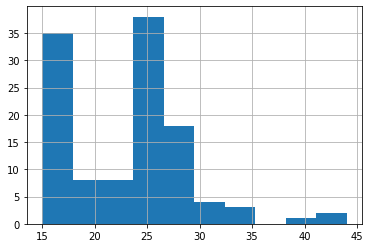

In [20]:
# I chose hwy mileage as my indicator of fuel efficiency

is_1999.hwy.hist()

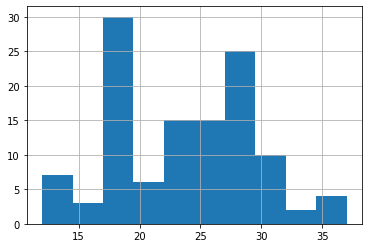

In [21]:
is_2008.hwy.hist()

In [22]:
# setting my confidence level
confidence_level = .95
a = 1 - confidence_level

# ttest_ind for two-sample t-tests
t, p = stats.ttest_ind(is_1999.hwy, is_2008.hwy)
t, p

(-0.03286431672888292, 0.9738110448529322)

In [23]:
# using the setup for a two_sample two_tailed test

if p < a:
    print("We reject the null hypothesis that there is no difference in fuel-efficiency in cars from 2008 vs 1999")
else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support the claim that fuel-efficiency levels are different")

We fail to reject the null hypothesis
Not enough evidence to support the claim that fuel-efficiency levels are different


In [66]:
# Question 2: Are compact cars more fuel-efficient than the average car?
# setting up my null, alt and confidence level

null = "There is no difference in mpg between compact cars and the average car"
alt_hypothesis = "Compact cars have greater mpg than the average car"
confidence_level = .95
a = 1 - confidence_level


In [69]:
def compact(x):
    if x == "compact":
        return 1
    else:
        return 0

In [70]:
df["is_compact"] = df['class'].apply(compact)
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency,is_compact
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,1
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,1
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,1
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,1
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,1


In [71]:
compact = df[df.is_compact == 1]
avg_car = df[df.is_compact == 0]

In [72]:
# getting my t & p

t, p = stats.ttest_ind(compact.hwy, avg_car.hwy)
t, p

(6.844017913682101, 6.802262127570768e-11)

In [73]:
# running my one-tailed test

if (p/2) < a and t > 0:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    print("We don't have enough evidence to support the claim that", alt_hypothesis)

We reject the null hypothesis


In [80]:
# Question 3: Do manual cars get better gas mileage than automatic cars?

# setting up my null and alt
null = "There is no difference in gas mileage between manual cars and automatic cars"
alt_hypothesis = "Manual cars have greater gas mileage than automatic cars"

# setting up my confidence levels
confidence_level = .95
a = 1 - confidence_level

In [75]:
manual = df[df.trans.str[0] == 'm']
automatic = df[df.trans.str[0] == 'a']

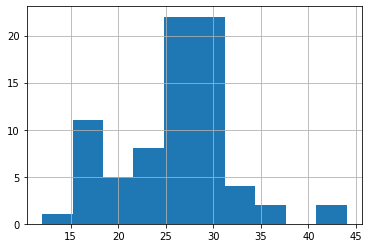

In [76]:
manual.hwy.hist()

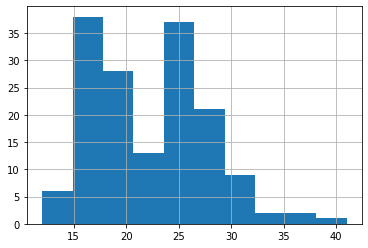

In [77]:
automatic.hwy.hist()

In [78]:
t, p = stats.ttest_ind(manual.hwy, automatic.hwy)
t, p

(4.368349972819688, 1.888044765552951e-05)

In [81]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars")
else:
    print("We fail to reject the null hypothesis")
    print("we don't have enough evidence to support the claim that", alt_hypothesis)

We reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars


### Correlation exercises

## 1 
- Use the telco_churn data. 


In [153]:
# imports
# data load
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from scipy import stats

np.random.seed(123)

from pydataset import data

from env import host, user, password

In [144]:
# Loading the dataset
df = pd.read_csv('Cust_Churn_Telco.csv')
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


- Does tenure correlate with monthly charges? 

In [145]:
# setting x, y
x = df.tenure
y = df.MonthlyCharges

# running Pearson's
corr, p = stats.pearsonr(x, y)

In [146]:
corr, p

(0.24789985628615002, 4.0940449915016345e-99)

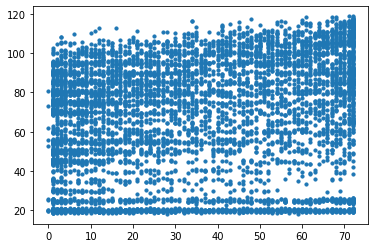

In [147]:
plt.scatter(x,y, s=10)

- Total charges?

In [154]:
# addressing nulls in TotalCharges

#df = df.dropna(axis = 0)

# Make any string with multiple spaces into an empty space value
#df.TotalCharges = df.TotalCharges.str.strip()

# Count the number of empty string entries
#df[df.TotalCharges == ""]
def wrangle_telco():
    df.tenure.replace(0, 1, inplace=True)
    df.TotalCharges.replace(' ', df.MonthlyCharges, inplace=True)
    df.TotalCharges = df.TotalCharges.astype(float)
    return df

In [156]:
telco = wrangle_telco()

In [157]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [159]:
# setting x, y

i = df.tenure
z = df.TotalCharges

# running Pearson's
corr, p = stats.pearsonr(i, z)

In [160]:
corr, p

(0.8261696009160197, 0.0)

- What happens if you control for phone and internet service?

## 2

- Use the employees database.

In [184]:
# Loading the dataset
def get_connection(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
sql_query = '''
            SELECT *
            FROM employees
            JOIN salaries ON (employees.emp_no = salaries.emp_no);
            '''

df = pd.read_sql(sql_query, get_connection('employees'))

In [185]:
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,66961,1990-06-25,1991-06-25


- Is there a relationship between how long an employee has been with the company and their salary?


- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

## 3

- Use the sleepstudy data. Is there a relationship between days and reaction time?

In [170]:
# Loading the dataset

df = data("sleepstudy")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
Reaction    180 non-null float64
Days        180 non-null int64
Subject     180 non-null int64
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [171]:
# setting my values

n = df.shape[0]
degf = n - 2
conf_inf = 0.95
alpha = 1 - conf_inf

In [172]:
#setting my x, y values

x = df.Days
y = df.Reaction

In [182]:
# running Pearson

corr, p = stats.pearsonr(x, y)

In [174]:
corr, p

(0.5352302262650253, 9.894096322214812e-15)

Text(8, 80, 'r = 0.535')

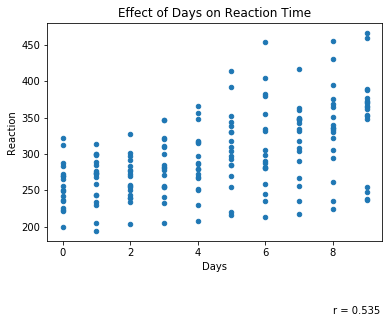

In [181]:
# visualizing the data

df.plot.scatter('Days', 'Reaction')
plt.title('Effect of Days on Reaction Time')
plt.text(8,80, f'r = {r:.3f}')

## Chi Squared

- 1. Use the following contingency table to help answer the question of whether using a 
     macbook and being a codeup student are independent of each other.

In [187]:
# making my table

index = ['Uses a Macbook', 'Doesnt Use a Macbook']
columns = ['Codeup Student', 'Not Codeup Student']

In [188]:
observed = pd.DataFrame([[49, 20], [1, 30]], index = index, columns = columns)
n = observed.values.sum()

In [197]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')


Observed

[[49 57 11]
 [54 49 14]]
---
Expected

[[51.5 53.  12.5]
 [51.5 53.  12.5]]
---

chi^2 = 1.2065
p     = 0.5470


- Choose another 2 categorical variables from the mpg dataset and perform a chi squared
 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [199]:
# Loading the dataset

df = data("mpg")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [200]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [202]:
# Stating the null, alternative and alpha
#null = the drive and the year are independent
#alternative = There is a dependence between the drive and the year
alpha = .05

observed = pd.crosstab(df.year, df.drv)
observed

drv,4,f,r
year,,,
1999,49,57,11
2008,54,49,14


In [195]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 57 11]
 [54 49 14]]
---
Expected

[[51.5 53.  12.5]
 [51.5 53.  12.5]]
---

chi^2 = 1.2065
p     = 0.5470


In [204]:
if p < alpha:
    print('We reject the null')
else:
    print("We fail to reject the null.")

We fail to reject the null.


## 3

- Use the data from the employees database to answer these questions:

In [ ]:
sql_query = '''
            SELECT *
            FROM employees
            JOIN salaries ON (employees.emp_no = salaries.emp_no);
            '''

df = pd.read_sql(sql_query, get_connection('employees'))

- Is an employees gender independent of whether an employee works in sales or marketing? (only look at current employees)

- Is an employees gender independent of whether or not they are or have been a manager?